In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
path=r"C:\Users\HP\Desktop\CODE\DATA ANALYSIS with PYTHON\cleaned_data_for 4(school admission data).csv"
df=pd.read_csv(path)
df.head()

,Unnamed: 0,Name,Age,Gender,Admission Test Score,High School Percentage,City,Admission Status,Binned_admission_Test_score,Accepted,Rejected
0,0,Shehroz,24.0,Female,50.0,68.900000,Quetta,Rejected,average score,0,1
1,1,Waqar,21.0,Female,99.0,60.730000,Karachi,Rejected,high score,0,1
2,2,Bushra,17.0,Male,89.0,75.014672,Islamabad,Accepted,average score,1,0
3,3,Aliya,17.0,Male,55.0,85.290000,Karachi,Rejected,average score,0,1
4,4,Bilal,20.0,Male,65.0,61.130000,Lahore,Rejected,average score,0,1


In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df.head()

,Name,Age,Gender,Admission Test Score,High School Percentage,City,Admission Status,Binned_admission_Test_score,Accepted,Rejected
0,Shehroz,24.0,Female,50.0,68.900000,Quetta,Rejected,average score,0,1
1,Waqar,21.0,Female,99.0,60.730000,Karachi,Rejected,high score,0,1
2,Bushra,17.0,Male,89.0,75.014672,Islamabad,Accepted,average score,1,0
3,Aliya,17.0,Male,55.0,85.290000,Karachi,Rejected,average score,0,1
4,Bilal,20.0,Male,65.0,61.130000,Lahore,Rejected,average score,0,1


### Taking "Admission Test Score" as the target variable

## SLR:

### First model-using AGE

In [5]:
x=df[['Age']]
y=df['Admission Test Score']

lm=LinearRegression()

lm.fit(x,y)

LinearRegression()

In [6]:
yhat1=lm.predict(x)
yhat1[0:5]

array([79.530674  , 77.79531321, 75.48149883, 75.48149883, 77.21685962])

In [7]:
lm.intercept_

np.float64(65.64778770581266)

In [8]:
lm.coef_

array([0.5784536])

<Axes: xlabel='Age', ylabel='Admission Test Score'>

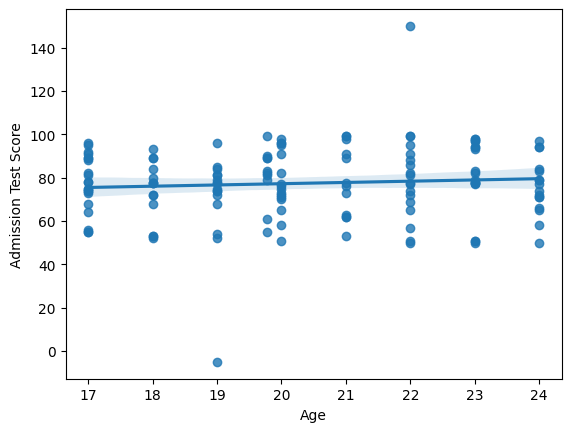

In [9]:
#plotting regplot our model:

sns.regplot(x='Age',y='Admission Test Score',data=df)

Hardly fits,we require another model

<Axes: xlabel='Age', ylabel='Admission Test Score'>

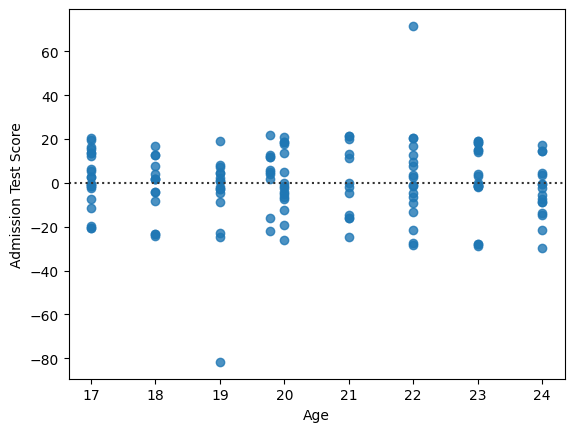

In [10]:
#plotitng resudial plot:
sns.residplot(x=df['Age'],y=df['Admission Test Score'])

Residual plot is fine (randomly distributed+ consistent variance and no curvature),still regplot is bad

### Second model using 'High School Percentage':

In [11]:
x1=df[['High School Percentage']]
y1=df['Admission Test Score']

lm2=LinearRegression()

lm2.fit(x1,y1)

LinearRegression()

In [ ]:
yhat2=lm2.predict(x1)
yhat2[0:5]

array([78.74384991, 80.15130146, 77.69047121, 75.92033327, 80.08239318])

In [13]:
lm2.intercept_

np.float64(90.61330057530753)

In [14]:
lm2.coef_

array([-0.17227069])

<Axes: xlabel='High School Percentage', ylabel='Admission Test Score'>

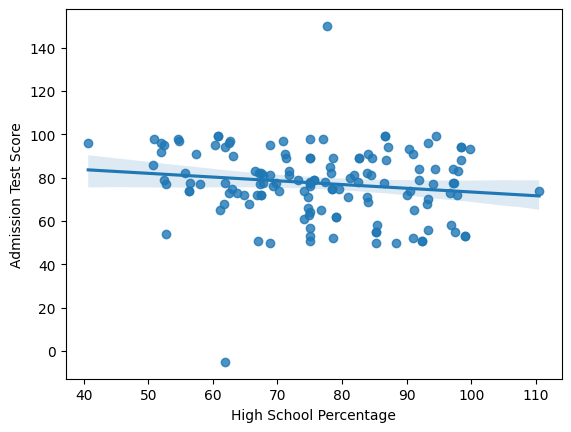

In [15]:
#plotting regplot for our model

sns.regplot(x='High School Percentage',y='Admission Test Score',data=df)


A better plot than using age

<Axes: xlabel='High School Percentage', ylabel='Admission Test Score'>

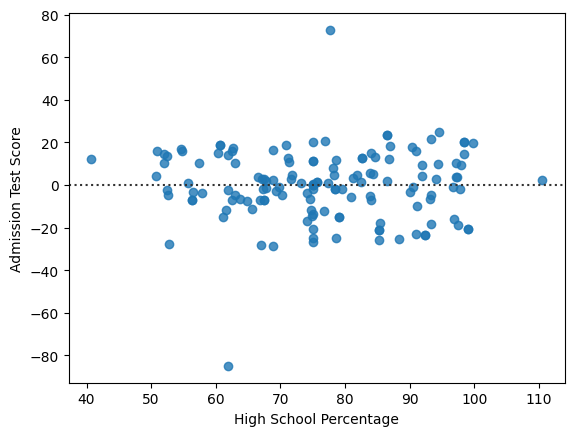

In [16]:
#plotitng resudial plot:
sns.residplot(x=df['High School Percentage'],y=df['Admission Test Score'])

The residual plot of age was also gppd, but the points are even closer here+ consistent variance + no curvature implies all good

## MLR:

In [17]:
z=df[['Age', 'High School Percentage']]

lm3=LinearRegression()

lm3.fit(z,df['Admission Test Score'])

LinearRegression()

In [18]:
lm3.coef_

array([ 0.67931425, -0.18241737])

In [19]:
lm3.intercept_

np.float64(77.52900054623817)

In [20]:
yhat3=lm3.predict(z)
yhat3[0:5]

array([81.26398587, 80.71639302, 75.39336384, 73.51896547, 79.96411182])

C:\Users\HP\AppData\Local\Temp\ipykernel_10784\1624519691.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1=sns.distplot(df['Admission Test Score'],hist=False,color='r',label='Actual Values')
C:\Users\HP\AppData\Local\Temp\ipykernel_10784\1624519691.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

<Axes: xlabel='Admission Test Score', ylabel='Density'>

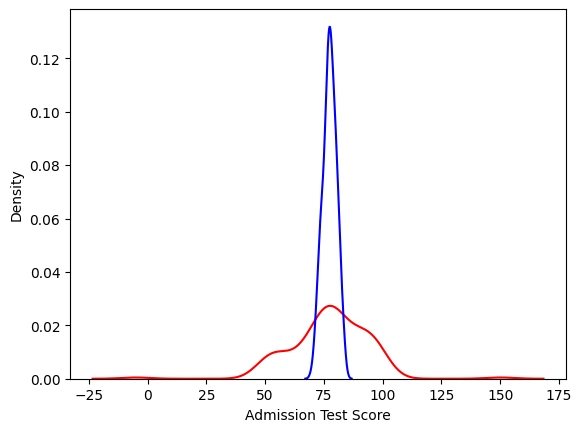

In [21]:
#plotting distribution plot for our MLR

ax1=sns.distplot(df['Admission Test Score'],hist=False,color='r',label='Actual Values')
sns.distplot(yhat3,hist=False,color='b',label='Predicted Values',ax=ax1)


The actual and predicted values varies extremely,cannot use the MLR

## Polynomial Regression:

### As the residual plots of SLR did not show any curvature,polynomial regression is not needed, but still doing it

In [22]:
#using high school percentage as the predictor variable (not age)
predictor=df['High School Percentage']
target=df['Admission Test Score']

func=np.polyfit(target,predictor,3)
eq=np.poly1d(func)



In [23]:
#prediction:
yhat4=eq(target)
yhat4[0:5]

array([82.13458556, 71.59896728, 73.74679469, 81.4842427 , 79.60350889])

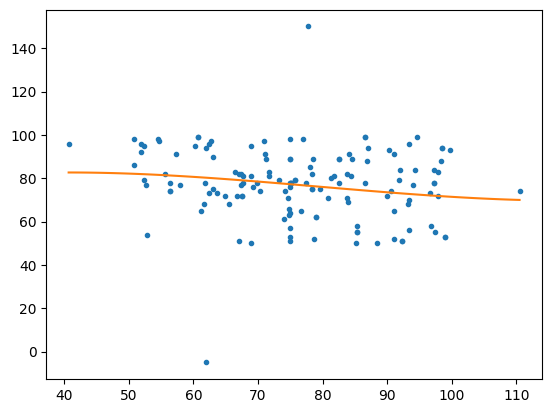

In [24]:
# plotting our polynoial regresison model

x_new = np.linspace(predictor.min(),predictor.max(),100)
y_new = eq(x_new)

plt.plot(predictor, target, '.', x_new, y_new, '-')


The model fits well, almost like a SLR(as mentioned earlier, we dont need polynomial regresison in this case as our residual plot is fine)

## We have 4 models:
### 1.yhat1(Rejected)
### 2.yhat2
### 3.yhat3(Rejected)
### 4.yhat4

## Finding MSE for all:

In [25]:
# for yhat1
mse1=mean_squared_error(y,yhat1)
mse1

np.float64(270.10460294985313)

In [26]:
# for yhat2
mse2=mean_squared_error(y,yhat2)
mse2

np.float64(266.0915000407445)

In [27]:
#yhat3
mse3=mean_squared_error(y,yhat3)
mse3

np.float64(263.6874017747191)

In [28]:
#yhat4
mse4=mean_squared_error(y,eq(x))
mse4

np.float64(274.0672339384507)

MSE is least for yhat2 and yhat3

## Finding R^2 for all:

In [29]:
#yhat1
lm.score(x,y)
#extremely small value

0.006465474012013472

In [30]:
#yhat2
lm2.score(x1,y1)

0.021227000668715967

In [31]:
#yhat3
lm3.score(z,y)

0.03007007333418832

In [32]:
#yhat4
r2_score(predictor,target)

-1.748157233257671

The R^2 values of  model 2 and model 3 are fine;Thus these 2 models are selected for prediction

## Predicting new values using our model:

In [ ]:
# using model 2

new_input=np.arange(60,101,1).reshape(-1,1)#NOTE- its not linspace, its arange
y_new_predicted_values=lm2.predict(new_input)

y_new_predicted_values[0:5]
# basically the children having highschool percentages as 60,61,62,63 and 64 might have the following scores
# (also as we have seen a negative correlation of admission score and highschool percentage, it clearly shows, -children less school percentage have scored more and vice versa )

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([80.27705906, 80.10478837, 79.93251768, 79.76024699, 79.5879763 ])